In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')
sns.set_color_codes('muted')

In [5]:
## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/Replication'
os.chdir(filepath)

In [6]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.1


In [7]:
new_df = pd.read_csv('nline_data.csv',sep='\t')

In [8]:
new_df.catch.unique()

array([  0.,   1.,  nan])

In [9]:
len(new_df)

7104

In [10]:
new_df.loc[:,:]= new_df[new_df['catch']<1]
#len(nline_miss)
new_df['Missed'] = new_df['Error']
new_df.loc[new_df['Missed']<1,'Missed'] = 0
#Pick only responded trials
new_df.loc[:,:] = new_df[new_df['Missed']==0]

In [11]:
new_df = new_df[pd.notnull(new_df['Subject'])]

In [12]:
len(new_df)

5039

In [13]:
new_df.loc[:,'AbsError'] = np.abs(new_df['Error'])

In [14]:
new_df['BigError'] = 0
new_df.loc[new_df['AbsError']>0.15,'BigError'] = 1
new_df['BigError'].sum()

87

In [15]:
new_df.loc[:,'Task'] = new_df['Task'].replace([1,2,3],['N+', 'N-/+', 'Word'])

In [16]:
new_df.Task

0       Word
2       Word
3       Word
6       Word
7       Word
8       Word
9       Word
10      Word
11      Word
12      Word
14      Word
15      Word
18        N+
20        N+
21        N+
22        N+
23        N+
24        N+
25        N+
26        N+
27        N+
28        N+
29        N+
31        N+
32      N-/+
33      N-/+
34      N-/+
36      N-/+
37      N-/+
38      N-/+
        ... 
7055    N-/+
7058      N+
7060      N+
7063      N+
7066      N+
7067      N+
7072    N-/+
7073    N-/+
7074    N-/+
7075    N-/+
7077    N-/+
7080    N-/+
7081    N-/+
7083    N-/+
7084    N-/+
7085    N-/+
7086    N-/+
7087    N-/+
7089    Word
7090    Word
7091    Word
7092    Word
7093    Word
7094    Word
7096    Word
7097    Word
7099    Word
7100    Word
7101    Word
7103    Word
Name: Task, dtype: object

In [17]:
pal = sns.color_palette()

In [18]:
new_df = new_df.sort_values(by='Line_pct')

In [19]:
np.sort(new_df.Subject.unique())

array(['s_04101', 's_04102', 's_04103', 's_04105', 's_04106', 's_04107',
       's_04108', 's_04109', 's_04110', 's_04111', 's_04112', 's_04113',
       's_04114', 's_04115', 's_04118', 's_04119', 's_04120', 's_04201',
       's_04202', 's_04203', 's_04204', 's_04205', 's_04206', 's_04207',
       's_04208', 's_04209', 's_04210', 's_04211', 's_04212', 's_04213',
       's_04214', 's_04215', 's_04216', 's_04217', 's_04218', 's_04219',
       's_04220'], dtype=object)

In [20]:
#new_df.loc[:,:] = new_df[new_df['Subject']!='s_04116']

In [21]:
#df.loc[:,:] = new_df[new_df['Subject']!='s_04117']

In [22]:
#df.loc[:,:] = new_df[new_df['Subject']!='s_04104']

In [23]:
#new_df = new_df[pd.notnull(new_df['Subject'])]

In [24]:
len(new_df)

5039

In [25]:
np.sort(new_df.Subject.unique())

array(['s_04101', 's_04102', 's_04103', 's_04105', 's_04106', 's_04107',
       's_04108', 's_04109', 's_04110', 's_04111', 's_04112', 's_04113',
       's_04114', 's_04115', 's_04118', 's_04119', 's_04120', 's_04201',
       's_04202', 's_04203', 's_04204', 's_04205', 's_04206', 's_04207',
       's_04208', 's_04209', 's_04210', 's_04211', 's_04212', 's_04213',
       's_04214', 's_04215', 's_04216', 's_04217', 's_04218', 's_04219',
       's_04220'], dtype=object)

In [26]:
plt_df = new_df.copy()
plt_df = plt_df.groupby(['Task','Line_pct','Subject']).mean()
plt_df.to_csv('plot_data.csv', sep='\t')
plt_df = pd.read_csv('plot_data.csv',sep='\t')

## RT boxplots

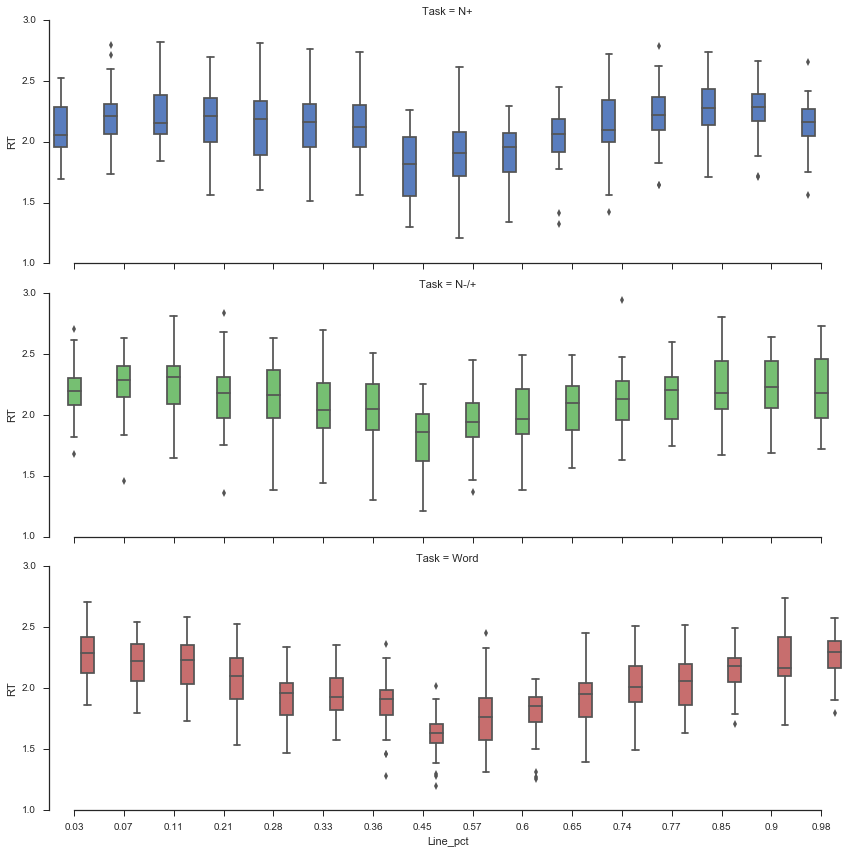

In [27]:
ax = sns.factorplot(x='Line_pct',y='RT',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3)
sns.despine(trim=True)

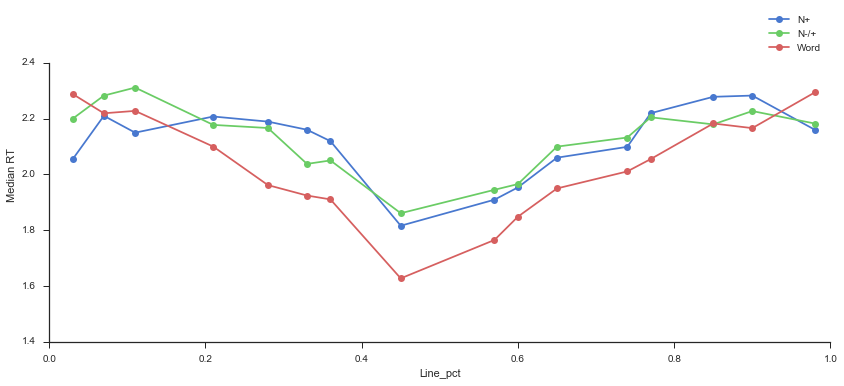

In [28]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['RT'].median(),'-o',label=key)
plt.legend(loc = 'best')
plt.ylim([1.4,2.6])
plt.xlabel('Line_pct')
plt.ylabel('Median RT')
sns.despine(trim=True)

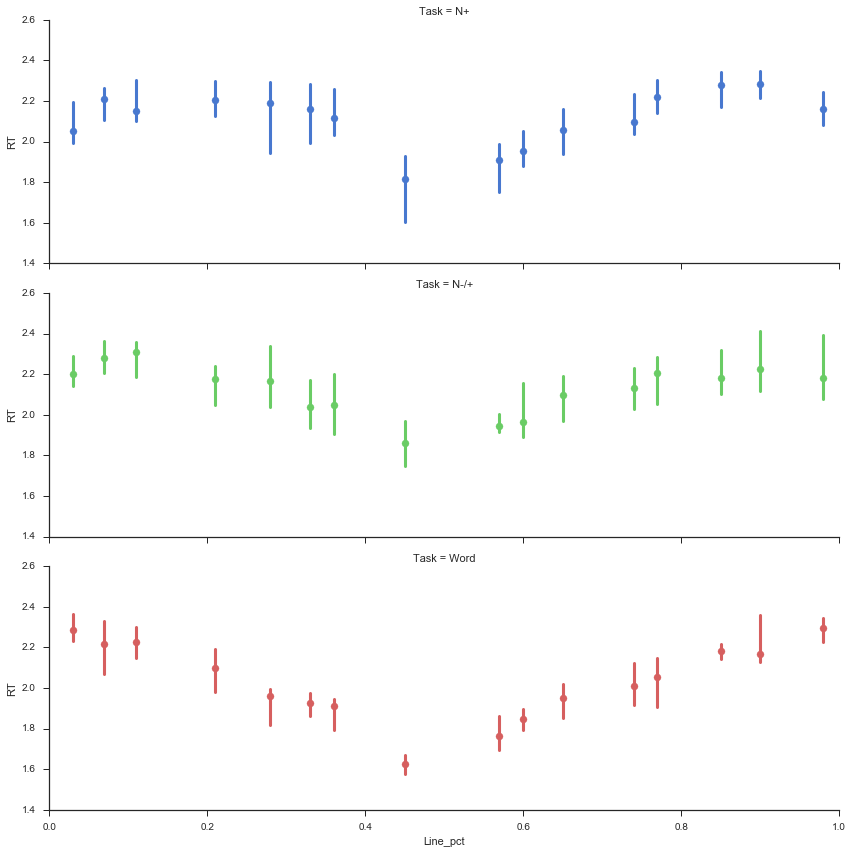

In [29]:
g = sns.FacetGrid(plt_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'RT', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

In [30]:
#ax = sns.factorplot(x='Line_pct',y='RT',hue='Task',row='Task',data=plt_df,kind='point',estimator=np.median,size=4,aspect=3)
#sns.despine(trim=True)

In [31]:
#sns.factorplot(x='Line_pct',y='RT',hue='Task',row='Task',data=new_df,kind='box',size=4,aspect=3)
#sns.despine(trim=True)

In [32]:
len(plt_df.loc[plt_df['Task']=='N-/+','RT'].get_values())

592

Subtraction is being calculates as 1. Take mean for each subject on each position(3 values),then subtract from each (subject,value) pair in the N+ task the value from the same (subject,value) pair in the word task. Then take the median of the result.

In [33]:
plt_df.loc[plt_df['Task']=='N+','RT-'] = plt_df.loc[plt_df['Task']=='N+','RT'].get_values() - plt_df.loc[plt_df['Task']=='Word','RT'].get_values()

In [34]:
plt_df.loc[plt_df['Task']=='N-/+','RT-'] = plt_df.loc[plt_df['Task']=='N-/+','RT'].get_values() - plt_df.loc[plt_df['Task']=='Word','RT'].get_values()

In [35]:
plt_df.loc[plt_df['Task']=='Word',['RT','RT-']].head(15)

,RT,RT-
1184,2.432685,NaN
1185,2.329889,NaN
1186,2.337345,NaN
1187,2.214865,NaN
1188,2.677682,NaN
1189,2.477185,NaN
1190,1.894781,NaN
1191,1.988802,NaN
1192,2.320400,NaN
1193,2.088058,NaN


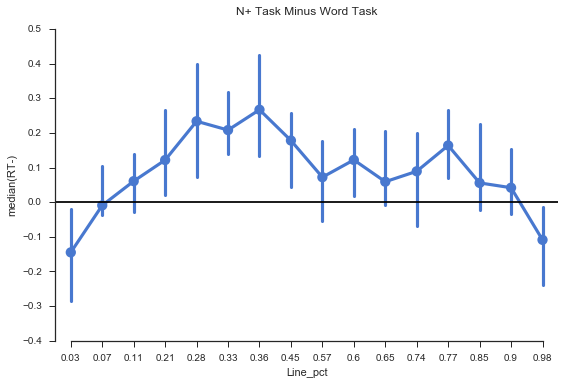

In [36]:
ax = sns.pointplot(x=plt_df.loc[plt_df['Task']=='N+','Line_pct'],y=plt_df.loc[plt_df['Task']=='N+','RT-'],estimator=np.median,size=4,aspect=3)
plt.axhline(y=0, color='black')
plt.title('N+ Task Minus Word Task', y=1.03)
sns.despine(trim=True)
plt.tight_layout()

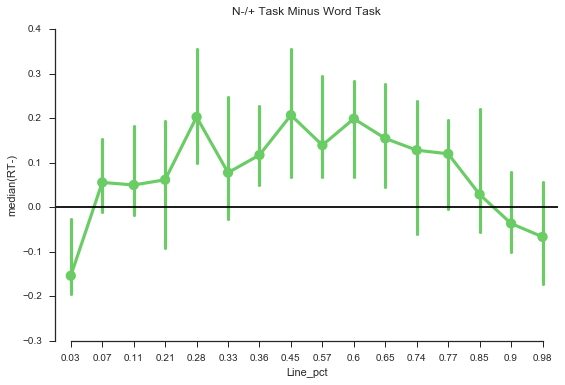

In [37]:
ax = sns.pointplot(x=plt_df.loc[plt_df['Task']=='N-/+','Line_pct'],y=plt_df.loc[plt_df['Task']=='N-/+','RT-'],estimator=np.median,size=4,aspect=3,color=pal[1])
plt.axhline(y=0, color='black')
plt.title('N-/+ Task Minus Word Task',y=1.03)
sns.despine(trim=True)
plt.tight_layout()

#MAE boxplots

With means for each subject

In [38]:
#ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3)
#sns.despine(trim=True)

Y axis different to see details on all plots

In [39]:
#ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=False)
#sns.despine(trim=True)

In [40]:
#median_df = new_df.copy()

In [41]:
#median_df = median_df.groupby(['Task','Line_pct','Subject']).median()

In [42]:
#median_df.to_csv('plot_data_median.csv', sep='\t')

In [43]:
#median_df = pd.read_csv('plot_data_median.csv',sep='\t')

In [44]:
#ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=median_df,kind='box',size=4,aspect=3)
#sns.despine(trim=True)

In [45]:
#ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='point',estimator=np.median,size=4,aspect=3)
#sns.despine(trim=True)

###Remove S_04208

In [46]:
plt_df = plt_df[plt_df['Subject']!='s_04208']

In [47]:
plt_df.Subject.unique()

array(['s_04101', 's_04102', 's_04103', 's_04105', 's_04106', 's_04107',
       's_04108', 's_04109', 's_04110', 's_04111', 's_04112', 's_04113',
       's_04114', 's_04115', 's_04118', 's_04119', 's_04120', 's_04201',
       's_04202', 's_04203', 's_04204', 's_04205', 's_04206', 's_04207',
       's_04209', 's_04210', 's_04211', 's_04212', 's_04213', 's_04214',
       's_04215', 's_04216', 's_04217', 's_04218', 's_04219', 's_04220'], dtype=object)

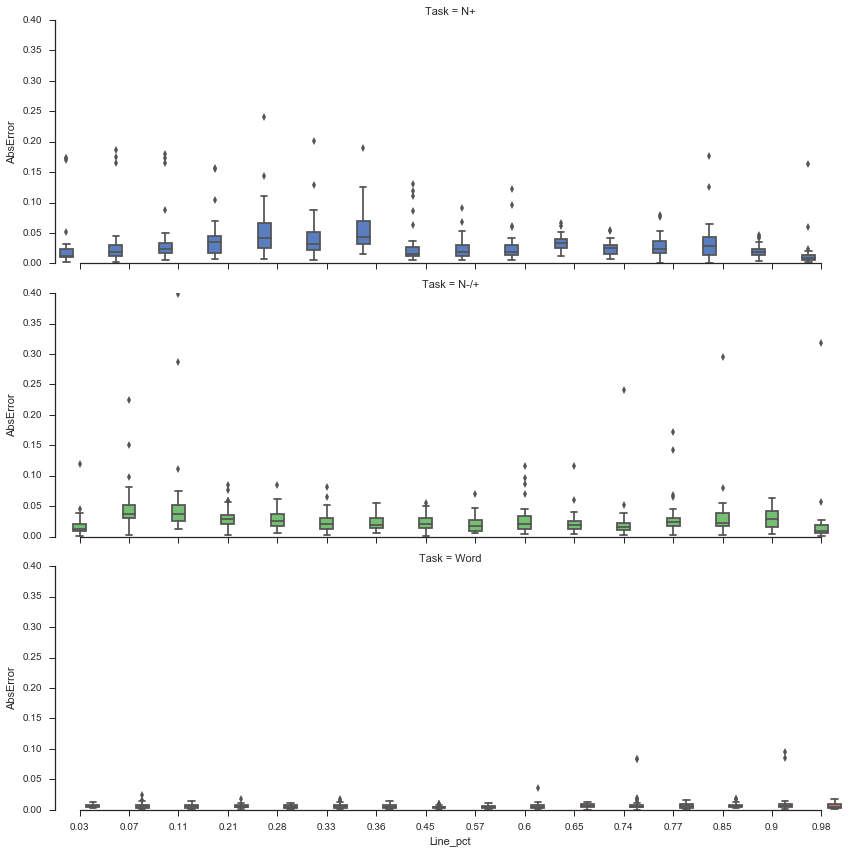

In [48]:
ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)

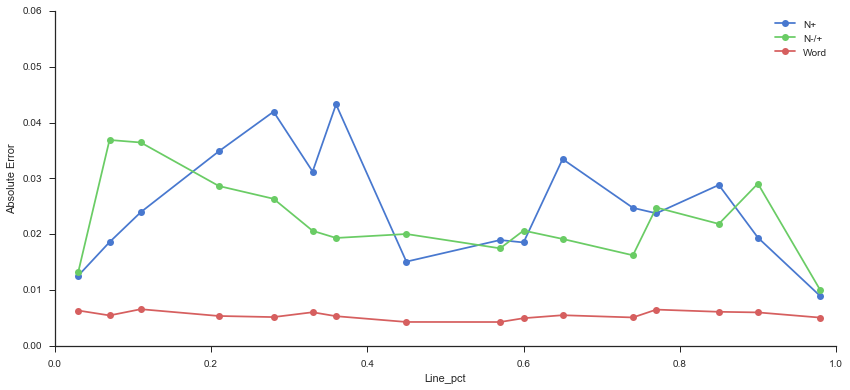

In [49]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['AbsError'].median(),'-o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,0.06])
plt.xlabel('Line_pct')
plt.ylabel('Absolute Error')
sns.despine(trim=True)

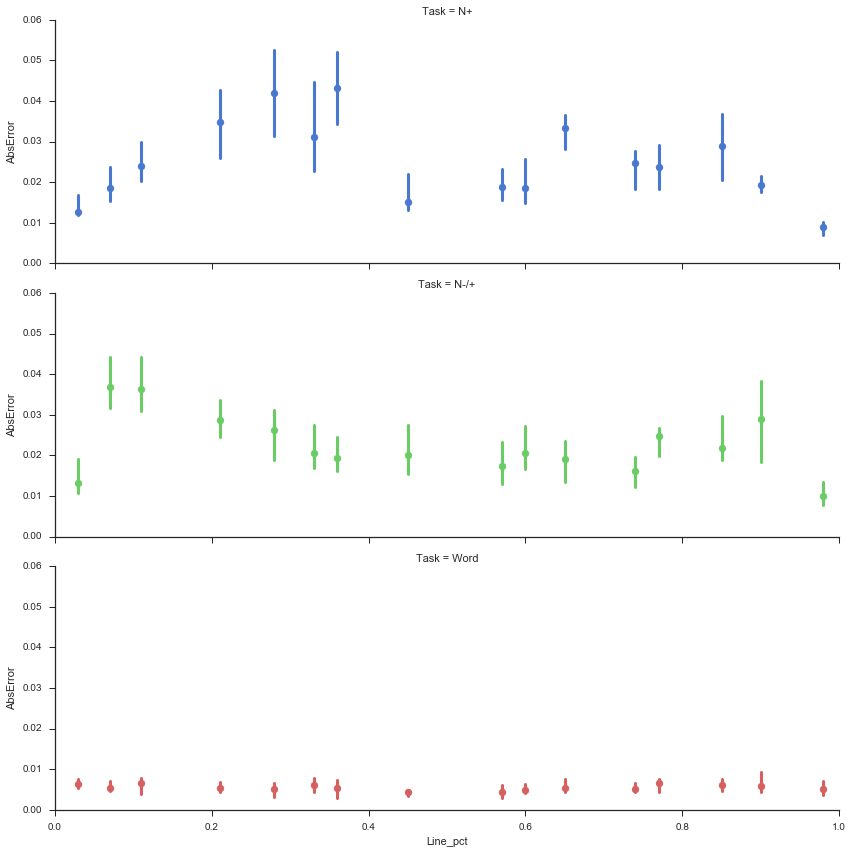

In [50]:
g = sns.FacetGrid(plt_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'AbsError', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

In [51]:
#ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='point',estimator=np.median,size=4,aspect=3)
#sns.despine(trim=True)

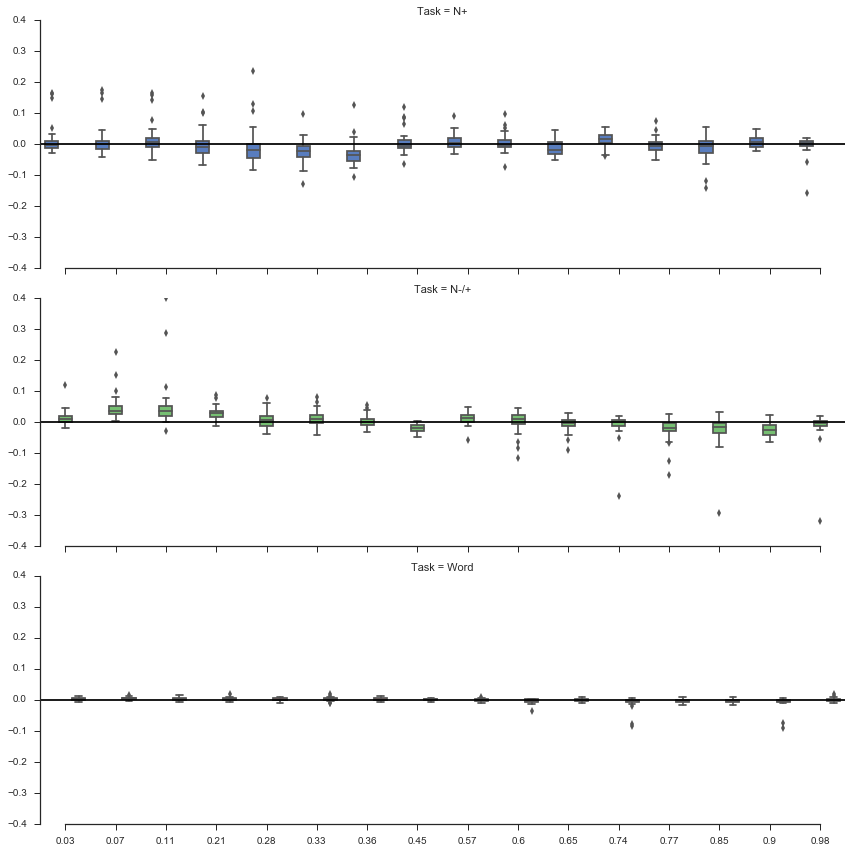

In [52]:
ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)
ax.map(plt.axhline, y=0, color='black')

## Remove Big Errors

In [53]:
plt_df = new_df.copy()

In [54]:
len(plt_df)

5039

In [55]:
plt_df = plt_df[plt_df['Subject']!='s_04208']

In [56]:
len(plt_df)

4914

In [57]:
plt_df = plt_df[plt_df['BigError']==0]

In [58]:
len(plt_df)

4853

In [59]:
plt_df.BigError.unique()

array([0])

In [60]:
plt_df = plt_df.groupby(['Task','Line_pct','Subject']).mean()
plt_df.to_csv('plot_data.csv', sep='\t')
plt_df = pd.read_csv('plot_data.csv',sep='\t')

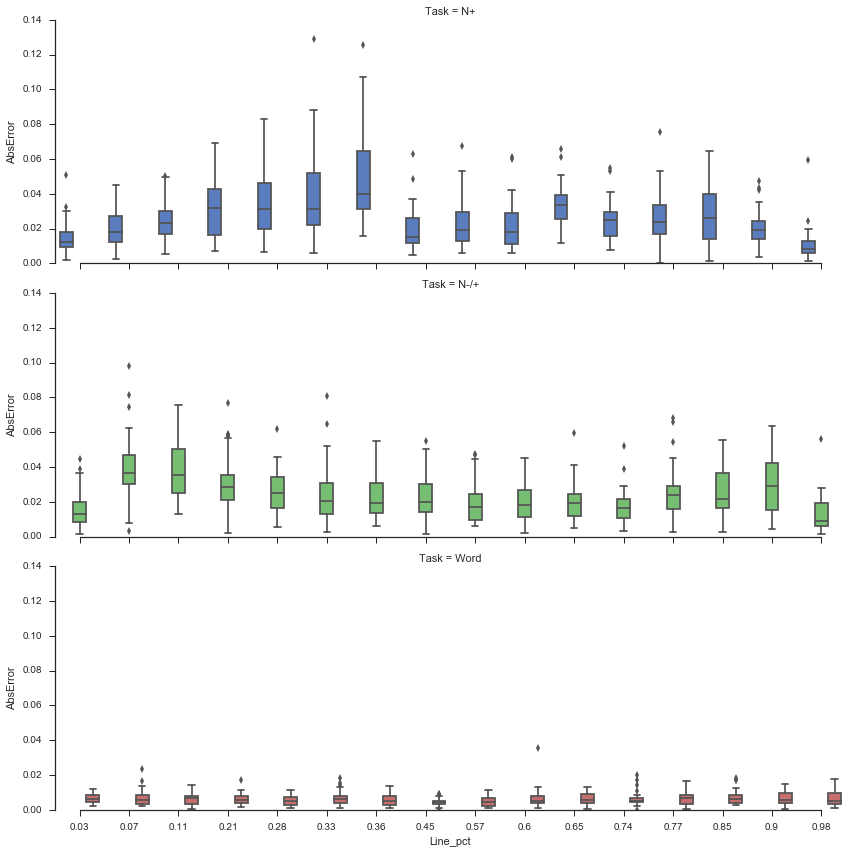

In [61]:
ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)

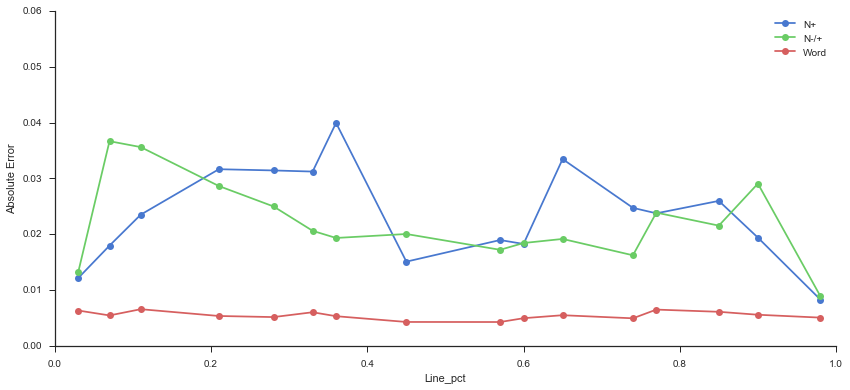

In [62]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['AbsError'].median(),'-o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,0.06])
plt.xlabel('Line_pct')
plt.ylabel('Absolute Error')
sns.despine(trim=True)

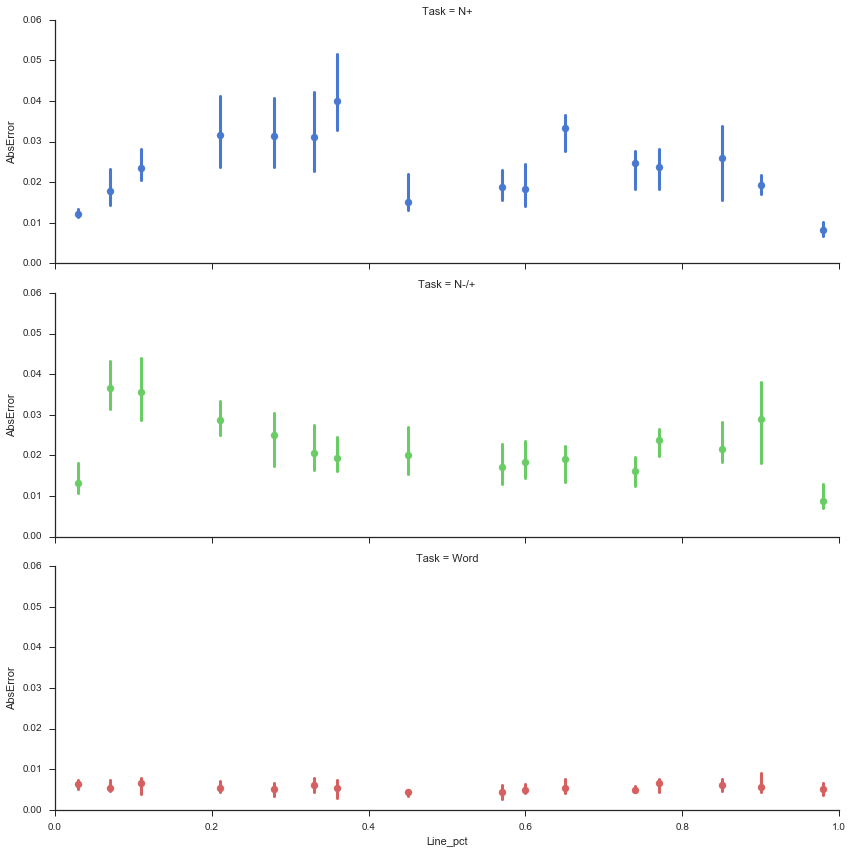

In [63]:
g = sns.FacetGrid(plt_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'AbsError', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

## Signed Error boxplot

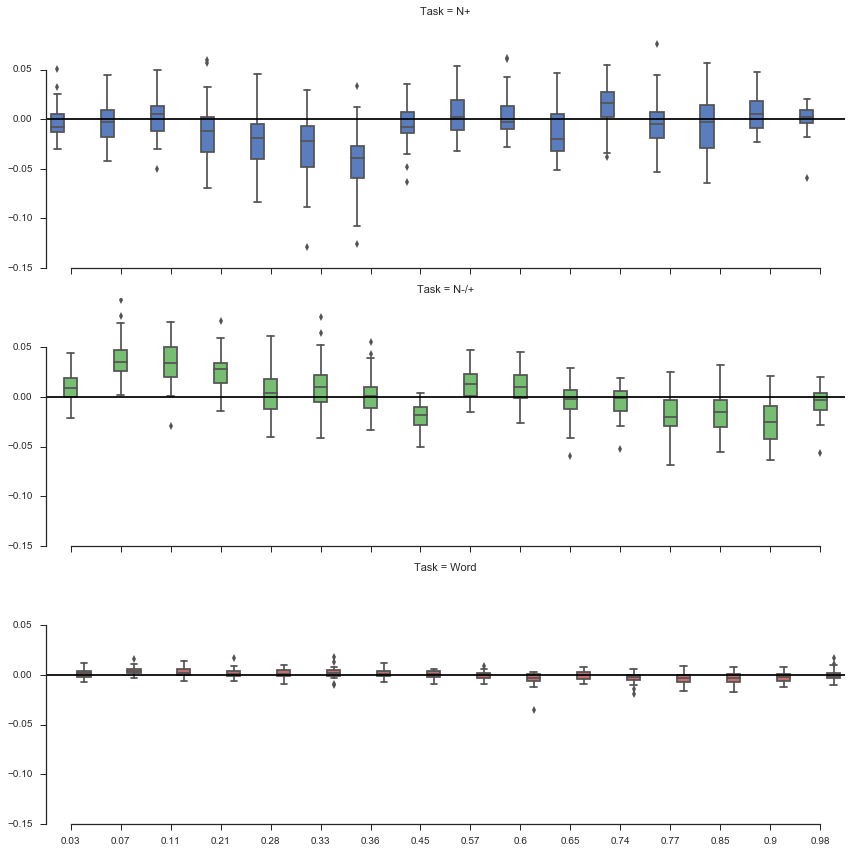

In [64]:
ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)
ax.map(plt.axhline, y=0, color='black')

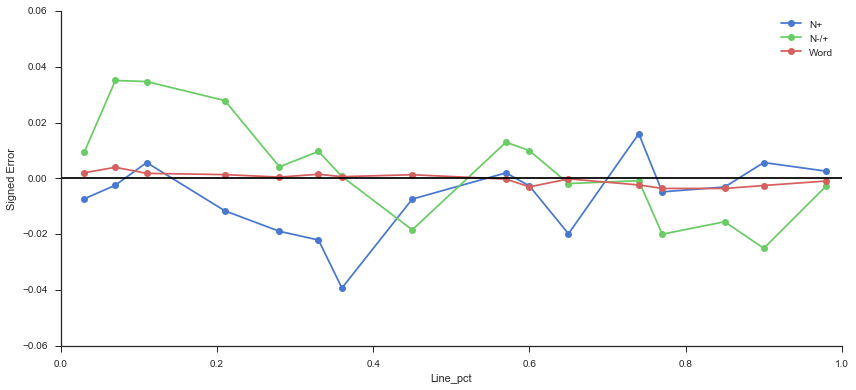

In [65]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['Error'].median(),'-o',label=key)
plt.axhline(y=0,color='black')
plt.legend(loc = 'best')
plt.ylim([-.06,0.06])
plt.xlabel('Line_pct')
plt.ylabel('Signed Error')
sns.despine(trim=True)

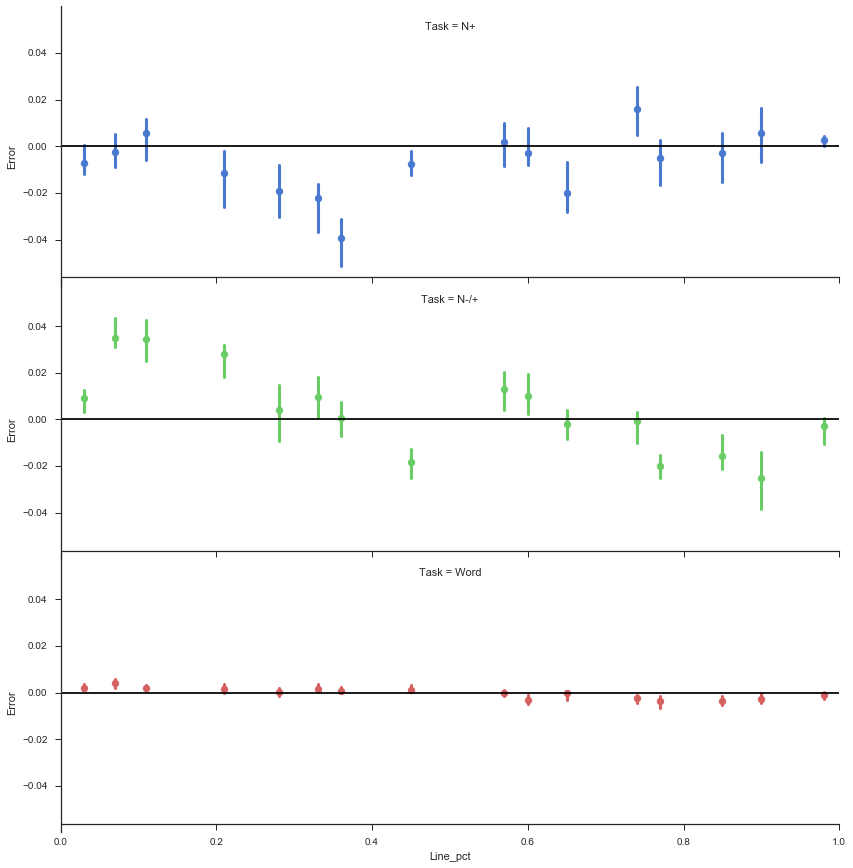

In [66]:
g = sns.FacetGrid(plt_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'Error', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)
for ax in g.axes.flat:
    ax.plot((0,1),(0,0),c='black')

In [67]:
#ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=plt_df,kind='point',size=4,aspect=3,estimator=np.median)
#sns.despine(trim=True)
#ax.map(plt.axhline, y=0, color='black')

## SD boxplot

In [68]:
sd_df = new_df.copy()

In [69]:
sd_df = sd_df[sd_df['Subject']!='s_04208']

In [70]:
sd_df = sd_df[sd_df['BigError']==0]

In [71]:
len(sd_df)

4853

In [72]:
sd_df = sd_df.groupby(['Task','Line_pct','Subject']).std()

In [73]:
sd_df.to_csv('plot_data_SD.csv', sep='\t')
sd_df = pd.read_csv('plot_data_SD.csv',sep='\t')

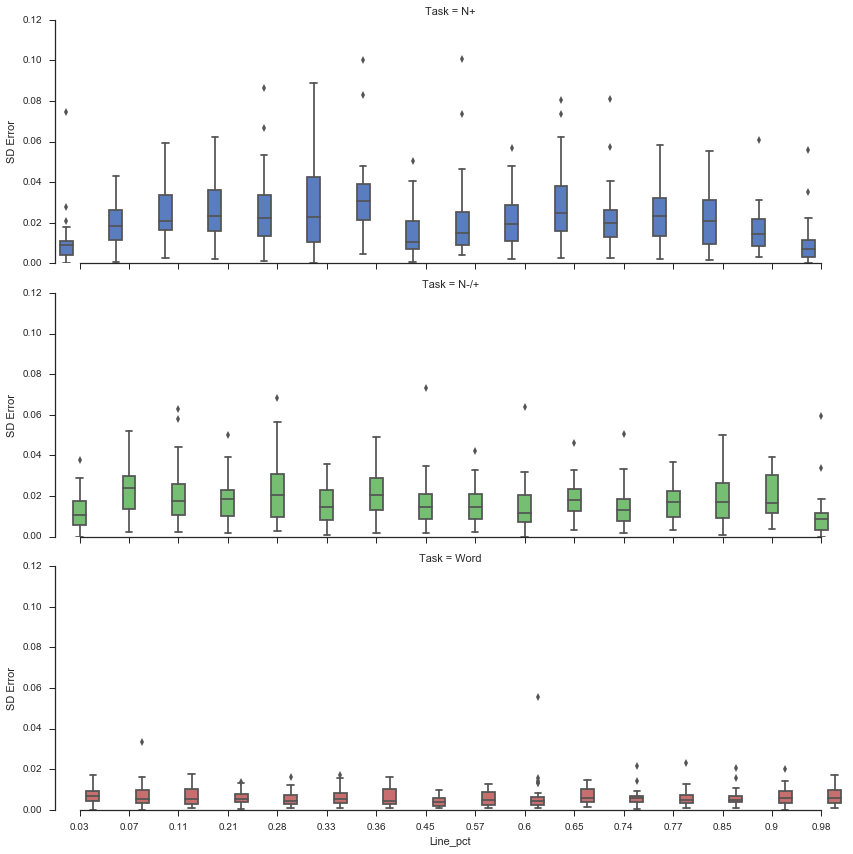

In [74]:
ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=sd_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)
(ax.set_axis_labels("Line_pct",'SD Error'))

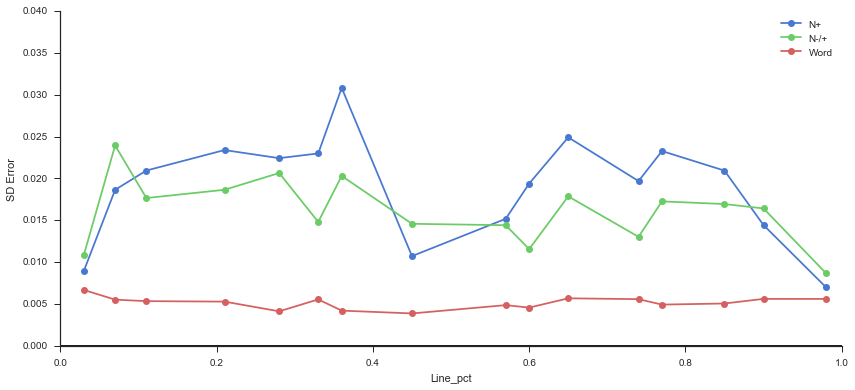

In [75]:
plt.figure(figsize=(14,6))
for key,grp in sd_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['Error'].median(),'-o',label=key)
plt.axhline(y=0,color='black')
plt.legend(loc = 'best')
plt.ylim([0,0.04])
plt.xlabel('Line_pct')
plt.ylabel('SD Error')
sns.despine(trim=True)

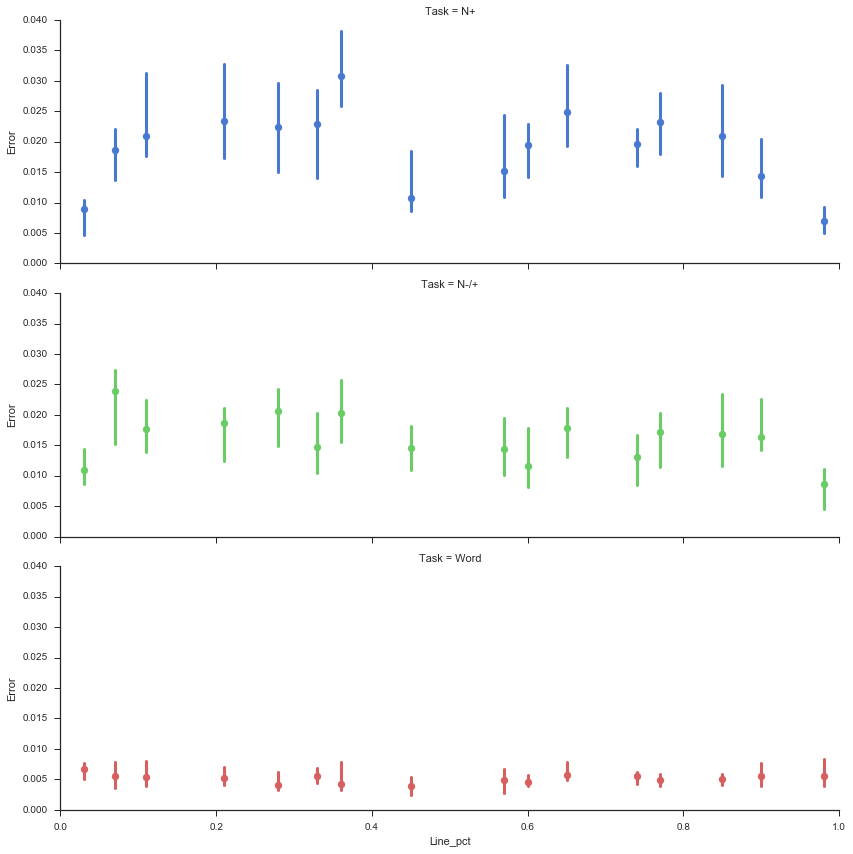

In [76]:
g = sns.FacetGrid(sd_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'Error', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

In [77]:
#ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=sd_df,kind='point',size=4,aspect=3,estimator=np.median)
#sns.despine(trim=True)

## Landmark Vs. MAE

In [78]:
plt_df.loc[:,'dist0'] = plt_df.Line_pct

In [79]:
plt_df.loc[:,'dist50'] = abs(plt_df.dist0 - 0.5)

In [80]:
plt_df.loc[:,'dist100'] = abs(plt_df.dist0 - 1)

In [81]:
plt_df.loc[:,'distLand'] = plt_df[['dist0','dist50','dist100']].min(1)

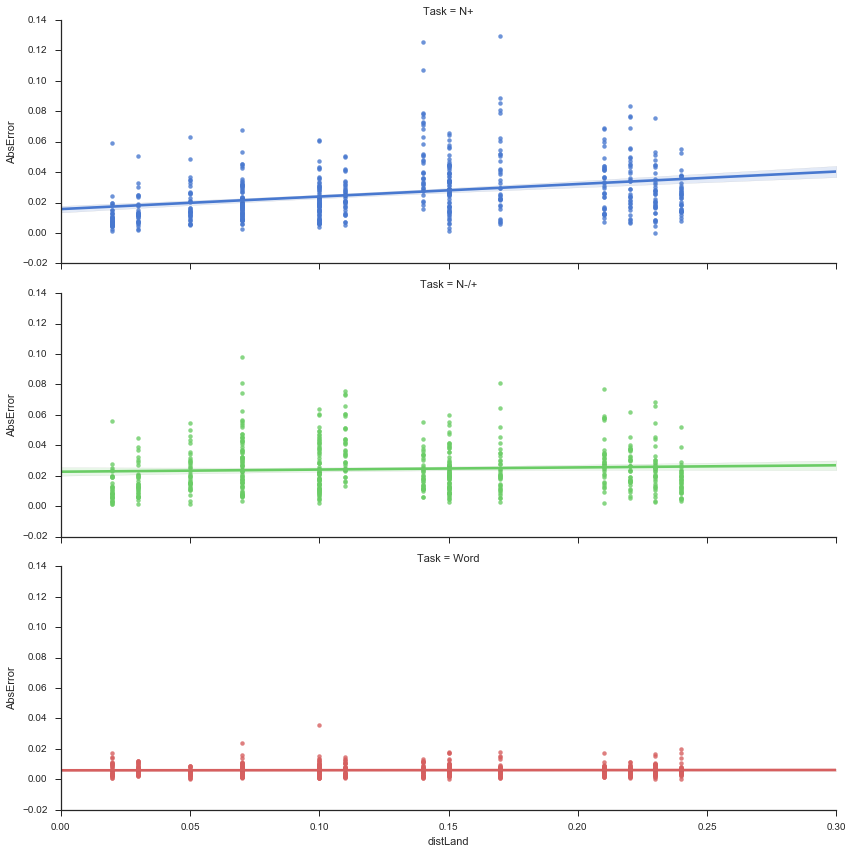

In [82]:
g = sns.lmplot(x='distLand',y='AbsError',hue='Task',row='Task',data=plt_df,size=4,aspect=3)

This is the same result as the other notebook but shows the difference in size of outliers to central tendency as reflected by the median calculated at each landmark distance.

In [83]:
#plt_df.groupby(['Task','distLand'])['AbsError'].mean()

In [84]:
#x = np.sort(plt_df.distLand.unique())
#x

In [85]:
#y = plt_df.groupby(['Task','distLand'])['AbsError'].median().iloc[0:14]
#y

In [86]:
#plt.plot(x,y,'o')

In [87]:
#np.corrcoef(x,y)

## Landmark distance Vs signed error

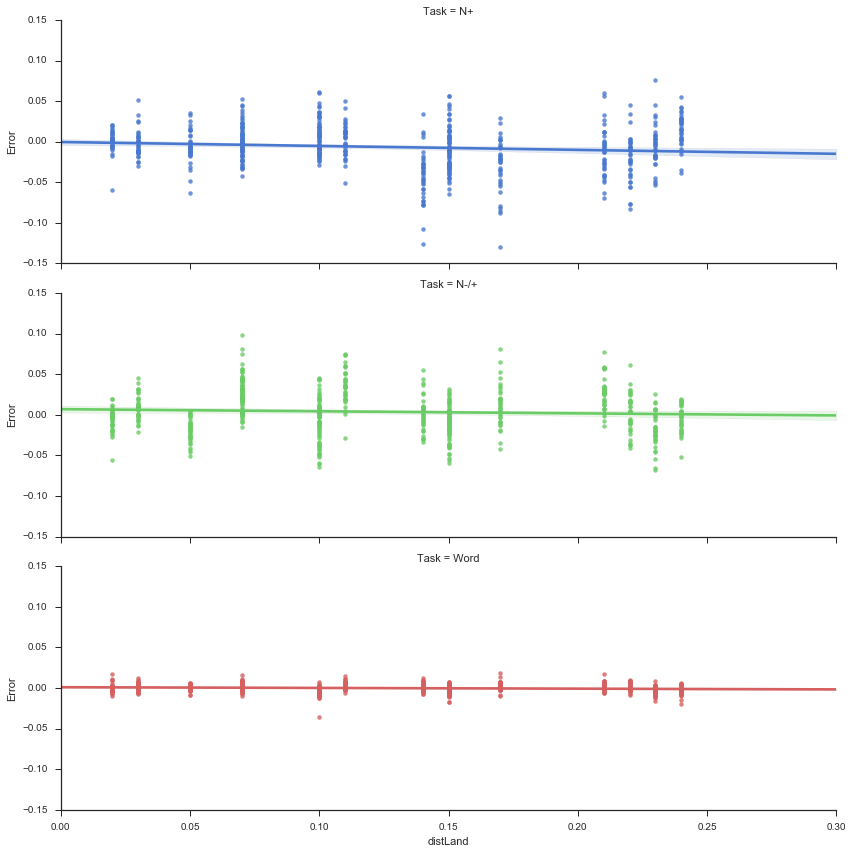

In [88]:
g = sns.lmplot(x='distLand',y='Error',hue='Task',row='Task',data=plt_df,size=4,aspect=3)

## Math Score and MAE

In [89]:
math = pd.read_csv('MathScores.csv')

In [90]:
plt_df = pd.merge(plt_df,math,on='Subject',how='inner')

In [91]:
sat_df = plt_df.groupby(['Task', 'Subject']).mean()

In [92]:
sat_df.to_csv('plot_data_SAT.csv', sep='\t')
sat_df = pd.read_csv('plot_data_SAT.csv',sep='\t')

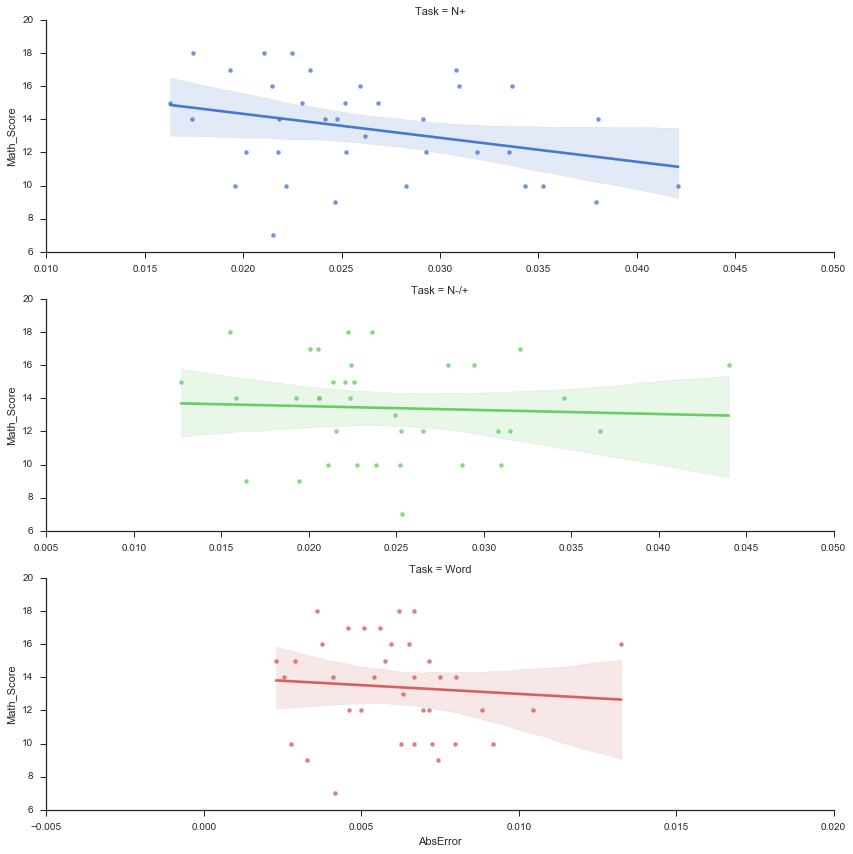

In [93]:
g = sns.lmplot(x='AbsError',y='Math_Score',hue='Task',row='Task',data=sat_df,size=4,aspect=3,sharex=False,truncate=True)

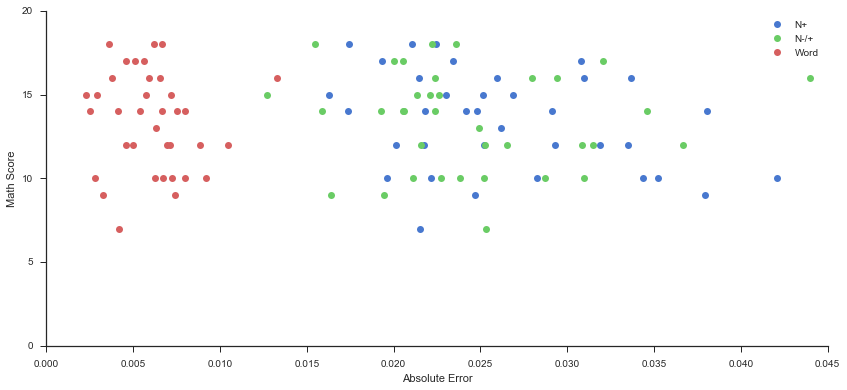

In [94]:
plt.figure(figsize=(14,6))
for key,grp in sat_df.groupby('Task'):
    plt.plot(grp.AbsError,grp.Math_Score,'o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,20])
plt.xlabel('Absolute Error')
plt.ylabel('Math Score')
sns.despine(trim=True)

## Signed Error vs SAT

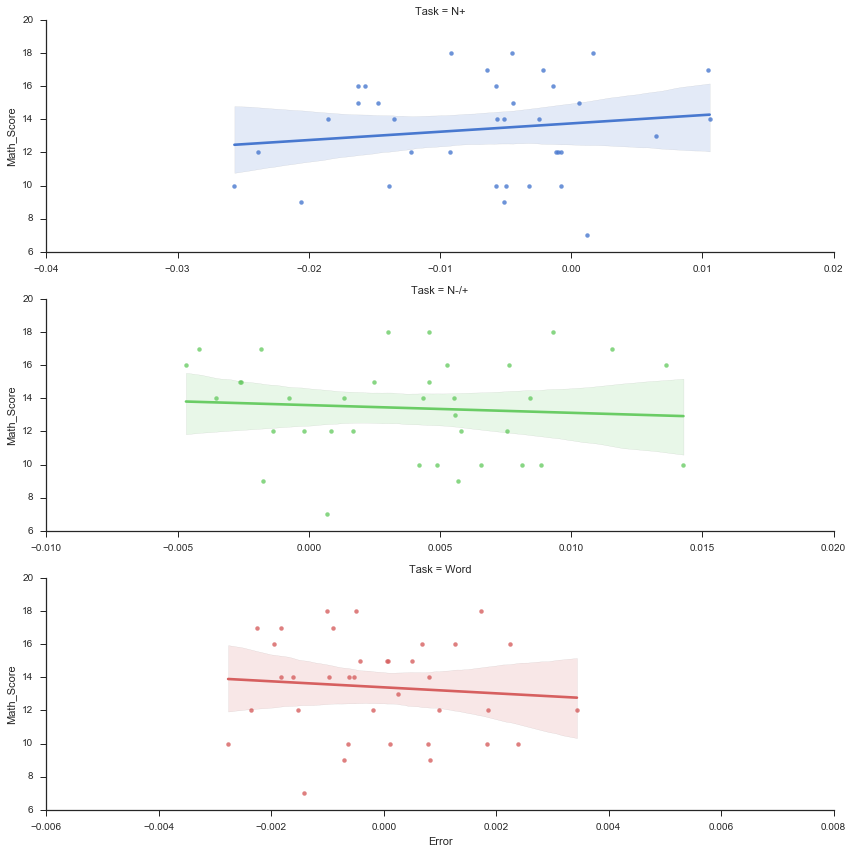

In [95]:
g = sns.lmplot(x='Error',y='Math_Score',hue='Task',row='Task',data=sat_df,size=4,aspect=3,sharex=False,truncate=True)

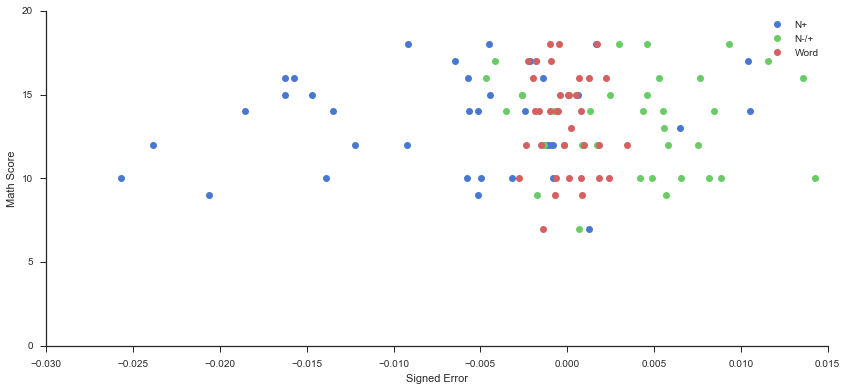

In [96]:
plt.figure(figsize=(14,6))
for key,grp in sat_df.groupby('Task'):
    plt.plot(grp.Error,grp.Math_Score,'o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,20])
plt.xlabel('Signed Error')
plt.ylabel('Math Score')
sns.despine(trim=True)